# Bathymetric Data Visualization
- __Overall Objective:__ Acquire vector or high-definition raster images of equal-depth lines from Meditteranean bathymetry data.
- __Sub-Objective (for this notebook):__ Get acquainted with how to fetch data from WFS, which offers bathymetric contour lines.
- __About Data:__  Aside from WCS, there is separate service called the Web Feature Service(WFS) offered by EMODNet.  It seems as if WFS is the only way to acquire their bathymetric contour lines, although you could hypothetically make them from raster data too (maybe I'll try that in another notebook). See README for more info.

In [1]:
# You can find more detail on these libraries by consulting my install script or
# visiting their page on CRAN.
library(XML)
library(ncdf4)
library(sp)
library(terra)
library(downloader)
library(ggplot2)
library(directlabels)
library(rasterVis)
library(raster)
library(gdalUtilities)

terra 1.7.55

Loading required package: lattice



In [2]:
# Set a bounding box for the Thermaic Gulf:
xmin <- 22.0
xmax <- 24.5
ymin <- 39.0
ymax <- 41.0

In [3]:
get_bathymetry_contours <- function(xmin = 22.5, xmax = 25, ymin = 37.5, ymax = 40) {
  feature_type <- "emodnet:contours"
  bounding_box <- paste(xmin, ymin, xmax, ymax, sep = ",")
  url <- paste("https://ows.emodnet-bathymetry.eu/wfs?service=WFS&version=1.0.0&request=GetFeature&typeName=",
               feature_type, "&OutputFormat=json&bbox=", bounding_box, sep = "")
  print(paste("FULL Request URL:", url))
  # a function in terra for reading a GeoJSON file into terra's S4 vector
  layer <- terra::vect(url) # , layer = "OGRGeoJSON"
  contours <- terra::geom(layer) # turning vect into geom matri
  contours <- as.data.frame(contours) # adding a data frame to geom matrix
  return(contours)
}

In [4]:
contours <- get_bathymetry_contours(xmin, xmax, ymin, ymax)

[1] "FULL Request URL: https://ows.emodnet-bathymetry.eu/wfs?service=WFS&version=1.0.0&request=GetFeature&typeName=emodnet:contours&OutputFormat=json&bbox=22,39,24.5,41"


In [5]:
head(contours)

,geom,part,x,y,hole
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,23.0419,39.0562,0
2,1,1,23.0419,39.0562,0
3,1,1,23.0430,39.0564,0
4,1,1,23.0436,39.0564,0
5,1,1,23.0455,39.0567,0
6,1,1,23.0458,39.0567,0


In [6]:
data_size <- object.size(contours) / 1e6
print(paste("This set of features is ", data_size, " MB"))
print("But the json retrieved from the website is only 1.7 MB")

[1] "This set of features is  3.743384  MB"
[1] "But the json retrieved from the website is only 1.7 MB"


In [7]:
cities <- c("Thessaloniki", "Michaniona")
y <- c(40.6401, 40.4667)
x <- c(22.9444, 22.8667)
city_coords <- data.frame(city = cities, y = y, x = x)

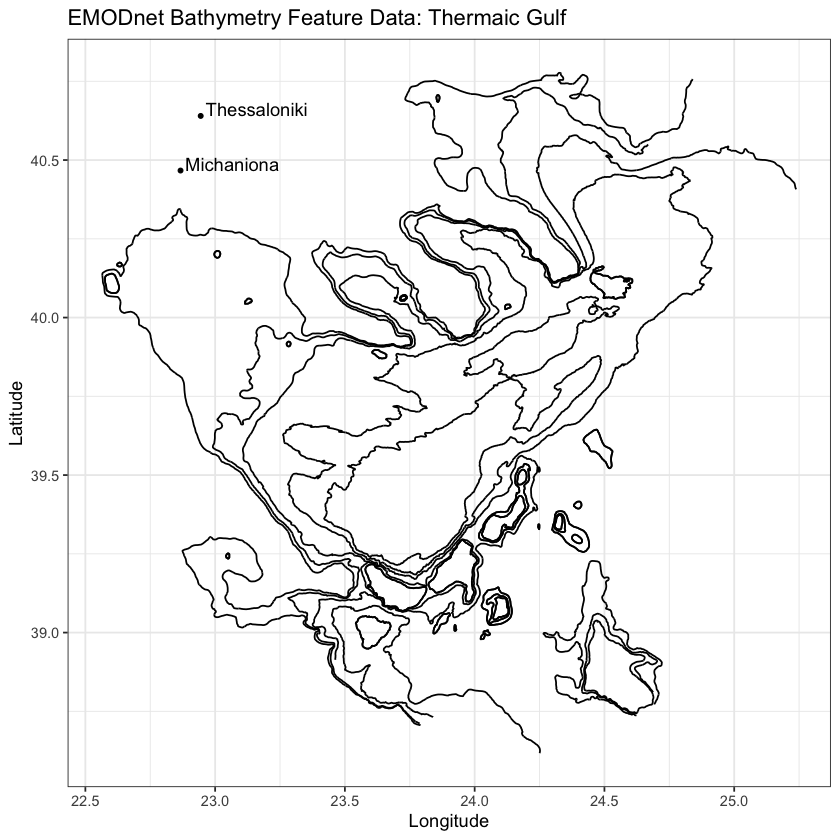

In [8]:
map <- ggplot() +
  geom_path(data = contours, aes(x = x, y = y, group = geom),
            colour = "black") +
  geom_point(data = city_coords, aes(x, y), size = 1, inherit.aes = FALSE) +
  geom_text(data = city_coords, aes(x, y, label = city), inherit.aes = FALSE,
            hjust = -0.05, vjust = 0) +
  ggtitle("EMODnet Bathymetry Feature Data: Thermaic Gulf") +
  xlab("Longitude") +
  ylab("Latitude") +
  theme_bw()

map

_note to self:_ next time, we should figure out how to do a few things:
- [ ] request certain elevation separations
- [x] plot with ggplot
- [x] perhaps keep to GeoJSON and stay away from SpatVector??
- [ ] look at tutorial and see if we did anything wrong with WFS